## Mapped Correlations (figure 1) 

This notebook will be used to:
- Show a map of the ecoregions used in this paper
- The coeficients of Lasso regression for each ecoregion. Variables that do not show up are not chosen by the Lasso. 
    - TODO: significance for chosen variables. 
- Show the historical variance explained by regularized regression for atmos and plant centric variables. 

The data shown in this notebook's figures are generated by train_burn_area_classifier.ipynb

In [17]:
import numpy as np
from matplotlib import pylab as plt
from matplotlib import cm
from matplotlib import pyplot
import matplotlib.gridspec as gridspec
import matplotlib
import seaborn as sns
import pandas as pd 
import geopandas as geo
import seaborn as sns
import os

In [18]:
dataDir = os.path.join('..', 'Data', 'Analysis', 'results_geo_df')
geo_df_file = os.path.join(dataDir)

#### Load the Lasso coeficient and $R^2$ values created by __SCRIPTNAME__
- This is a geodataframe where the shapes and associated data are stored as a single data structure

In [19]:
divisions = geo.read_file(dataDir)
divisions.index = divisions.division
divisions.columns

Index(['AREA', 'division', 'OLS_r2', 'lasso_r2', 'lasso_alph', 'atmos_r2',
       'plant_r2', 'tas_winter', 'tas_spring', 'tas_summer', 'pr_winter',
       'pr_spring', 'pr_summer', 'sfcWind_wi', 'sfcWind_sp', 'sfcWind_su',
       'hurs_winte', 'hurs_sprin', 'hurs_summe', 'hfls_winte', 'hfls_sprin',
       'hfls_summe', 'VPD_winter', 'VPD_spring', 'VPD_summer', 'mrso_winte',
       'mrso_sprin', 'mrso_summe', 'evspsbl_wi', 'evspsbl_sp', 'evspsbl_su',
       'geometry'],
      dtype='object')

In [20]:
divisions.rename(columns={"sfcWind_wi":"sfcWind_wind","sfcWind_sp":"sfcWind_spring","sfcWind_su":"sfcWind_summer",
                            "hurs_winte":"hurs_winter","hurs_sprin":"hurs_spring", "hurs_summe":"hurs_summe", 
                            'hfls_winte':'hfls_winter', 'hfls_sprin':'hfls_spring','hfls_summe':'hfls_summer',
                            'mrso_winte':'mrso_winter','mrso_sprin':'mrso_spring', 'mrso_summe':'mrso_summer', 
                            'evspsbl_wi':'evspsbl_winter', 'evspsbl_sp':'evspsbl_spring', 'evspsbl_su':'evspsbl_summer'}, 
                 inplace=True)

In [21]:
usa = geo.read_file('../Data/GIS/cb_2017_us_state_500k')

Set static division colors 

In [22]:
n_div = divisions.shape[0]
tab10 = cm.get_cmap('tab10', n_div)
division_colors = tab10(range(n_div))
division_colors[0][0:3]
division_colors_hex = []
for i in range(n_div) :
    division_colors_hex.append(matplotlib.colors.to_hex(division_colors[i][0:3]))
    
division_colors_hex
divisions['division_colors'] = division_colors_hex

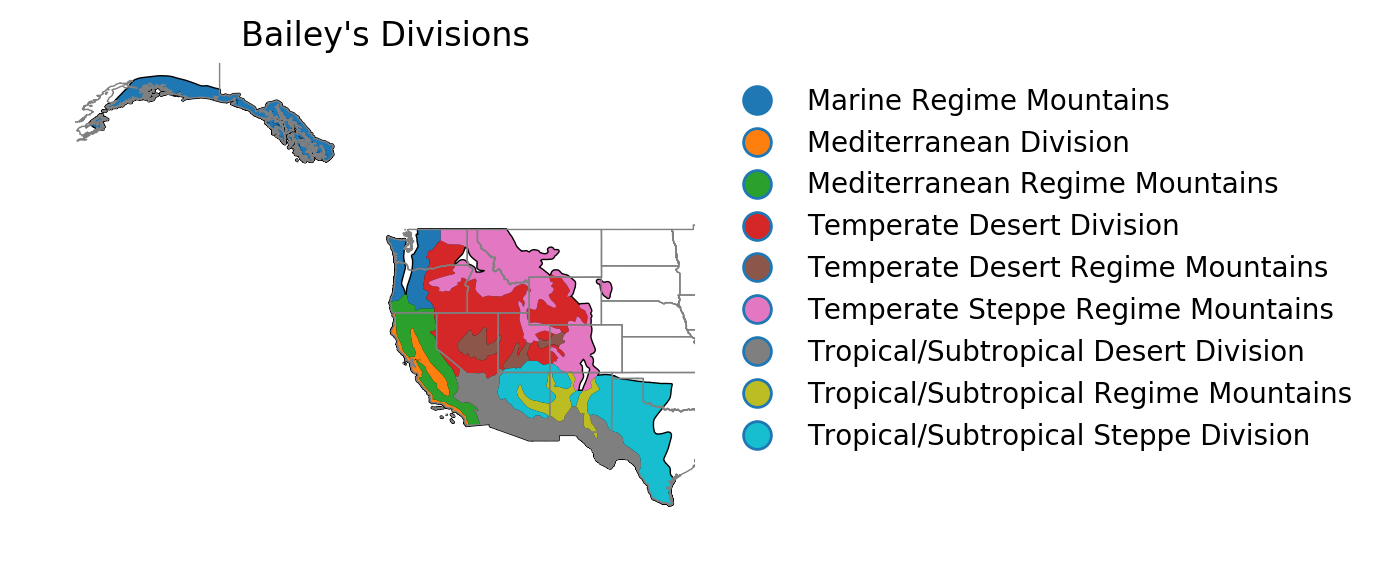

In [23]:
# Show the disolved divisions 
f, ax = plt.subplots(1, figsize=(4, 3), dpi=200)
ax.axis('off')

#base = usa.plot(ax=ax, color="white", edgecolor="black")
base = divisions.plot(ax=ax, color="white", edgecolor="black")
ax1 = divisions.plot(ax=base, column='division', cmap=tab10, categorical=True,legend=True)
plt.title("Bailey's Divisions")

ax2=usa.plot(ax=base, facecolor='none', edgecolor="gray", linewidth=0.5)
ax2.set_xlim(left=-155, right=-95)
ax2.set_ylim(bottom=25, top=63)

# handle the legend
leg = ax1.get_legend()
leg.set_bbox_to_anchor((0.6, 1, 1.5, 0.0))
leg.set_label(divisions.division)
leg.set_frame_on(False)
plt.savefig(fname="../Figures/div_map.png", format='png')
plt.show()

Show the variance explained by each of the categories of predictors, when only a single type is allowed to explain historical variance.

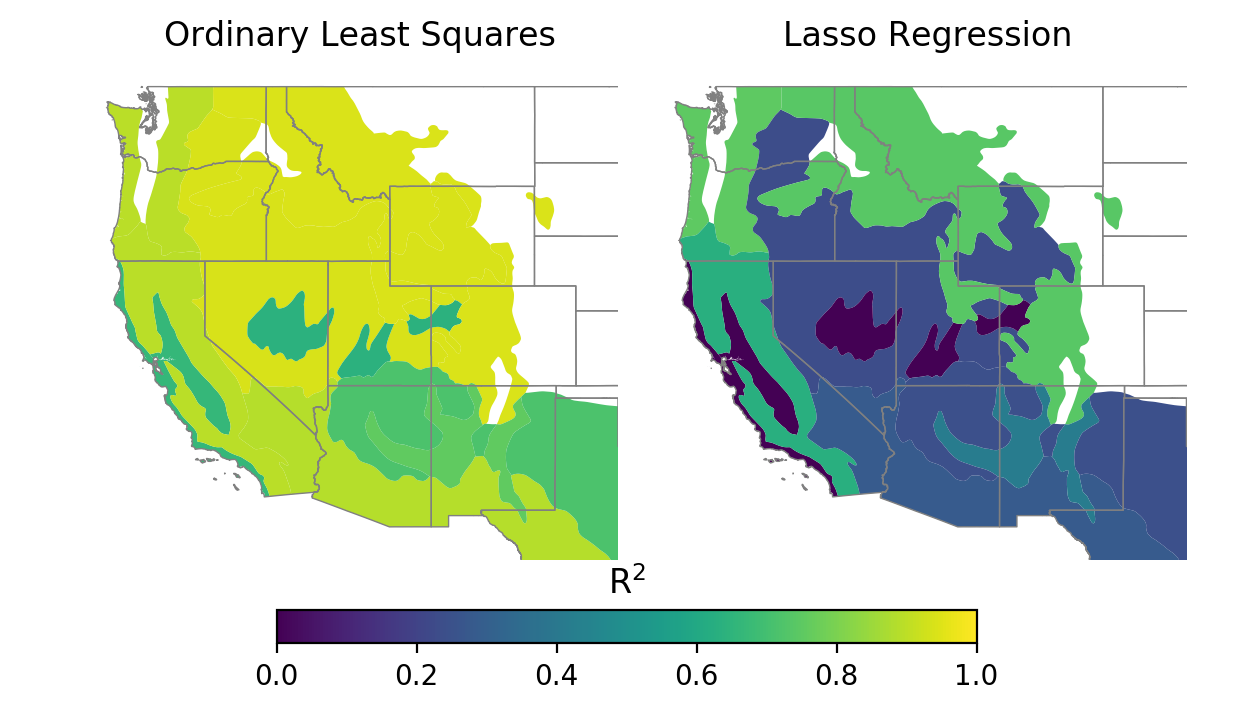

In [24]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=True, sharey=True, figsize=(7, 3.3), dpi=200)
ax1.axis('off')
ax2.axis('off')

#fig.suptitle('1984-2016 Burn Area Variance Explained')

divisions.plot(ax=ax1, column='OLS_r2', vmin=0, vmax=1, legend=False)
usa.plot(ax=ax1, facecolor='none', edgecolor="gray", linewidth=0.5)
ax1.set_xlim(left=-125, right=-100)
ax1.set_ylim(bottom=30, top=50)
ax1.set_title("Ordinary Least Squares")

divisions.plot(ax=ax2, column='lasso_r2', vmin=0, vmax=1, legend=False)
usa.plot(ax=ax2, facecolor='none', edgecolor="gray", linewidth=0.5)
ax2.set_xlim(left=-125, right=-100)
ax2.set_ylim(bottom=30, top=50)
ax2.set_title("Lasso Regression")

plt.subplots_adjust(wspace=0.1, hspace=0) # reduce spaces between panes

im = plt.gca().get_children()[0]
# [left, bottom, width, height]
# for horizontal bar
cax = fig.add_axes([0.25, 0, 0.5,0.05]) 
fig.colorbar(im, cax=cax, orientation="horizontal")
plt.title("R$^{2}$")
#cax = fig.add_axes([0.25, .2, 0.03, 0.4]) 
#fig.colorbar(im, cax=cax, orientation="vertical")
plt.show()

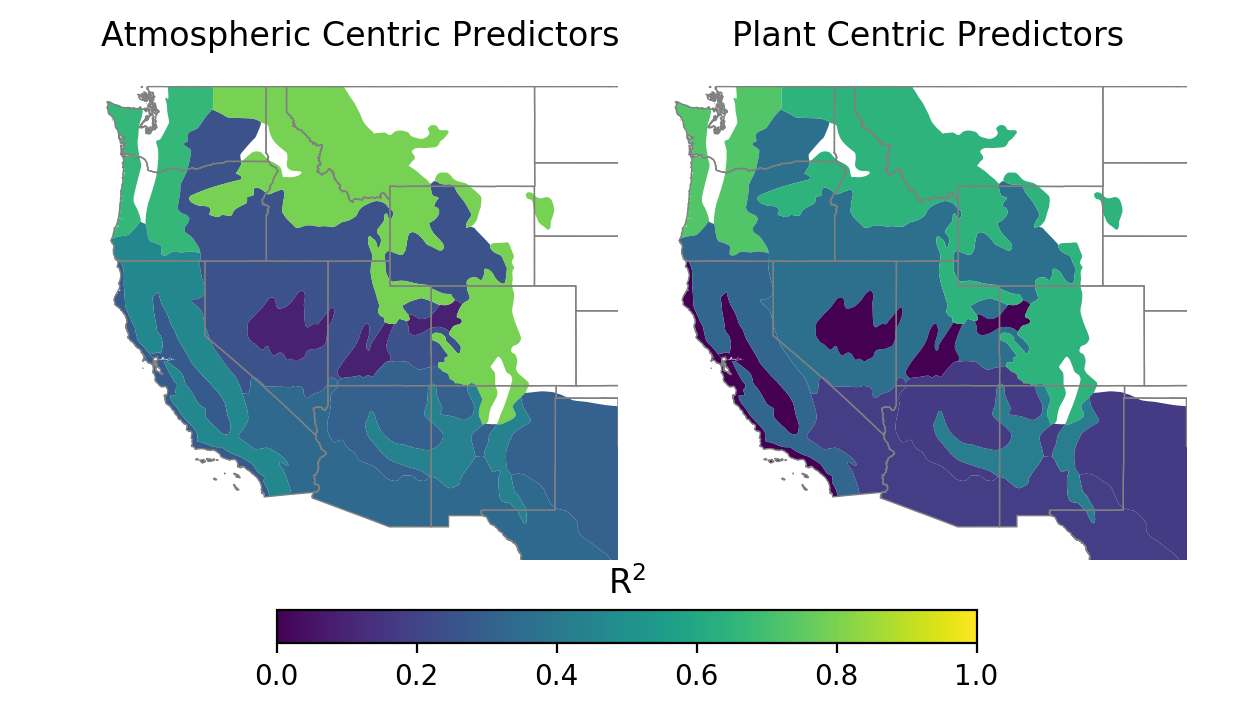

In [25]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=True, sharey=True, figsize=(7, 3.3), dpi=200)
ax1.axis('off')
ax2.axis('off')

#fig.suptitle('1984-2016 Burn Area Variance Explained')

divisions.plot(ax=ax1, column='atmos_r2', vmin=0, vmax=1, legend=False)
usa.plot(ax=ax1, facecolor='none', edgecolor="gray", linewidth=0.5)
ax1.set_xlim(left=-125, right=-100)
ax1.set_ylim(bottom=30, top=50)
ax1.set_title("Atmospheric Centric Predictors")

divisions.plot(ax=ax2, column='plant_r2', vmin=0, vmax=1, legend=False)
usa.plot(ax=ax2, facecolor='none', edgecolor="gray", linewidth=0.5)
ax2.set_xlim(left=-125, right=-100)
ax2.set_ylim(bottom=30, top=50)
ax2.set_title("Plant Centric Predictors")

plt.subplots_adjust(wspace=0.1, hspace=0) # reduce spaces between panes

im = plt.gca().get_children()[0]
# [left, bottom, width, height]
# for horizontal bar
cax = fig.add_axes([0.25, 0, 0.5,0.05]) 
fig.colorbar(im, cax=cax, orientation="horizontal")
plt.title("R$^{2}$")
#cax = fig.add_axes([0.25, .2, 0.03, 0.4]) 
#fig.colorbar(im, cax=cax, orientation="vertical")
plt.show()

Create a matrix of coefs from the predicts and Lasso. Use built in functions rather than for loops

In [26]:
divisions.columns

Index(['AREA', 'division', 'OLS_r2', 'lasso_r2', 'lasso_alph', 'atmos_r2',
       'plant_r2', 'tas_winter', 'tas_spring', 'tas_summer', 'pr_winter',
       'pr_spring', 'pr_summer', 'sfcWind_wind', 'sfcWind_spring',
       'sfcWind_summer', 'hurs_winter', 'hurs_spring', 'hurs_summe',
       'hfls_winter', 'hfls_spring', 'hfls_summer', 'VPD_winter', 'VPD_spring',
       'VPD_summer', 'mrso_winter', 'mrso_spring', 'mrso_summer',
       'evspsbl_winter', 'evspsbl_spring', 'evspsbl_summer', 'geometry',
       'division_colors'],
      dtype='object')

In [27]:
coef_df = divisions[['tas_winter', 'tas_spring', 'tas_summer', 'pr_winter',
                     'pr_spring', 'pr_summer', 'sfcWind_wind', 'sfcWind_spring',
                     'sfcWind_summer', 'hurs_winter', 'hurs_spring', 'hurs_summe',
                     'hfls_winter', 'hfls_spring', 'hfls_summer', 'VPD_winter', 'VPD_spring',
                     'VPD_summer', 'mrso_winter', 'mrso_spring', 'mrso_summer','evspsbl_winter', 
                     'evspsbl_spring', 'evspsbl_summer']].copy()
coef_df

,tas_winter,tas_spring,tas_summer,pr_winter,pr_spring,pr_summer,sfcWind_wind,sfcWind_spring,sfcWind_summer,hurs_winter,...,hfls_summer,VPD_winter,VPD_spring,VPD_summer,mrso_winter,mrso_spring,mrso_summer,evspsbl_winter,evspsbl_spring,evspsbl_summer
division,,,,,,,,,,,,,,,,,,,,,
Marine Regime Mountains,0.065740,-0.000000,0.022726,0.0,-0.126528,-0.575573,0.142409,-0.000000,0.191699,-0.0,...,-0.271934,-0.000000,-0.000000,0.000000,-0.378206,-0.210231,-0.186885,-0.0,0.000000,-0.0
Mediterranean Division,0.000000,0.000000,0.000000,0.0,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.0,...,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.000000,0.0
Mediterranean Regime Mountains,0.053769,0.000000,0.000000,-0.0,-0.000000,0.000000,0.104803,-0.015722,-0.022816,0.0,...,0.000000,0.000000,0.035951,0.000000,-0.000000,-0.100735,-0.000000,-0.0,-0.056447,0.0
Temperate Desert Division,0.000000,0.000000,0.032281,0.0,-0.000000,-0.064301,0.000000,0.000000,0.000000,-0.0,...,-0.000000,0.012336,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.0,-0.000000,-0.0
Temperate Desert Regime Mountains,0.000000,0.000000,0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,...,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.0
Temperate Steppe Regime Mountains,0.000000,0.027941,0.295067,0.0,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.0,...,-0.000000,-0.000000,0.132300,0.046349,0.000000,0.000000,-0.000000,0.0,0.000000,-0.0
Tropical/Subtropical Desert Division,0.000000,-0.000000,0.000000,0.0,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.0,...,-0.000000,-0.000000,0.000000,0.153930,0.000000,0.000000,0.000000,0.0,-0.000000,-0.0
Tropical/Subtropical Regime Mountains,0.000000,-0.000000,0.000000,-0.0,0.000000,-0.081444,-0.000000,-0.000000,-0.000000,-0.0,...,-0.000000,0.000000,0.000000,0.039259,-0.000000,-0.000000,-0.184543,-0.0,-0.000000,-0.0
Tropical/Subtropical Steppe Division,0.123193,-0.000000,0.273969,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,...,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.0


In [28]:
# remove any column where the sum is zero
coef_df = coef_df.iloc[:, np.array(coef_df.sum() != 0)]
coef_df

,tas_winter,tas_spring,tas_summer,pr_spring,pr_summer,sfcWind_wind,sfcWind_spring,sfcWind_summer,hurs_summe,hfls_winter,hfls_summer,VPD_winter,VPD_spring,VPD_summer,mrso_winter,mrso_spring,mrso_summer,evspsbl_spring
division,,,,,,,,,,,,,,,,,,
Marine Regime Mountains,0.065740,-0.000000,0.022726,-0.126528,-0.575573,0.142409,-0.000000,0.191699,-0.000000,-0.059259,-0.271934,-0.000000,-0.000000,0.000000,-0.378206,-0.210231,-0.186885,0.000000
Mediterranean Division,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
Mediterranean Regime Mountains,0.053769,0.000000,0.000000,-0.000000,0.000000,0.104803,-0.015722,-0.022816,-0.238493,-0.000000,0.000000,0.000000,0.035951,0.000000,-0.000000,-0.100735,-0.000000,-0.056447
Temperate Desert Division,0.000000,0.000000,0.032281,-0.000000,-0.064301,0.000000,0.000000,0.000000,-0.047707,0.000000,-0.000000,0.012336,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
Temperate Desert Regime Mountains,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
Temperate Steppe Regime Mountains,0.000000,0.027941,0.295067,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.116566,0.000000,-0.000000,-0.000000,0.132300,0.046349,0.000000,0.000000,-0.000000,0.000000
Tropical/Subtropical Desert Division,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.017537,0.000000,-0.000000,-0.000000,0.000000,0.153930,0.000000,0.000000,0.000000,-0.000000
Tropical/Subtropical Regime Mountains,0.000000,-0.000000,0.000000,0.000000,-0.081444,-0.000000,-0.000000,-0.000000,-0.238660,-0.000000,-0.000000,0.000000,0.000000,0.039259,-0.000000,-0.000000,-0.184543,-0.000000
Tropical/Subtropical Steppe Division,0.123193,-0.000000,0.273969,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000


Rearrange data to be friendly to plotting in seaborn. 

In [29]:
# TODO: Figure out how to do this without a loop but rather a pandas.reshape sort 
# TODO: of built in argument. 

n = coef_df.shape[0] * coef_df.shape[1]
df_ = pd.DataFrame(index=range(n), columns=['r', 'var', 'division'])
df_ = df_.fillna(0) # with 0s rather than NaNs

count = -1
for var in coef_df.columns.values : 
    for div in coef_df.index.values :
        count += 1 
        
        r = coef_df.loc[div, var].copy()
        # Print statement offers sanity check to make sure
        # data sorted to match grid above
        #print(var + ' ' + div + ': ' + str(r) ) 
        
        df_.loc[count, 'r'] = r
        df_.loc[count, 'var'] = var
        df_.loc[count, 'division'] = div
df_

,r,var,division
0,0.065740,tas_winter,Marine Regime Mountains
1,0.000000,tas_winter,Mediterranean Division
2,0.053769,tas_winter,Mediterranean Regime Mountains
3,0.000000,tas_winter,Temperate Desert Division
4,0.000000,tas_winter,Temperate Desert Regime Mountains
5,0.000000,tas_winter,Temperate Steppe Regime Mountains
6,0.000000,tas_winter,Tropical/Subtropical Desert Division
7,0.000000,tas_winter,Tropical/Subtropical Regime Mountains
8,0.123193,tas_winter,Tropical/Subtropical Steppe Division
9,-0.000000,tas_spring,Marine Regime Mountains


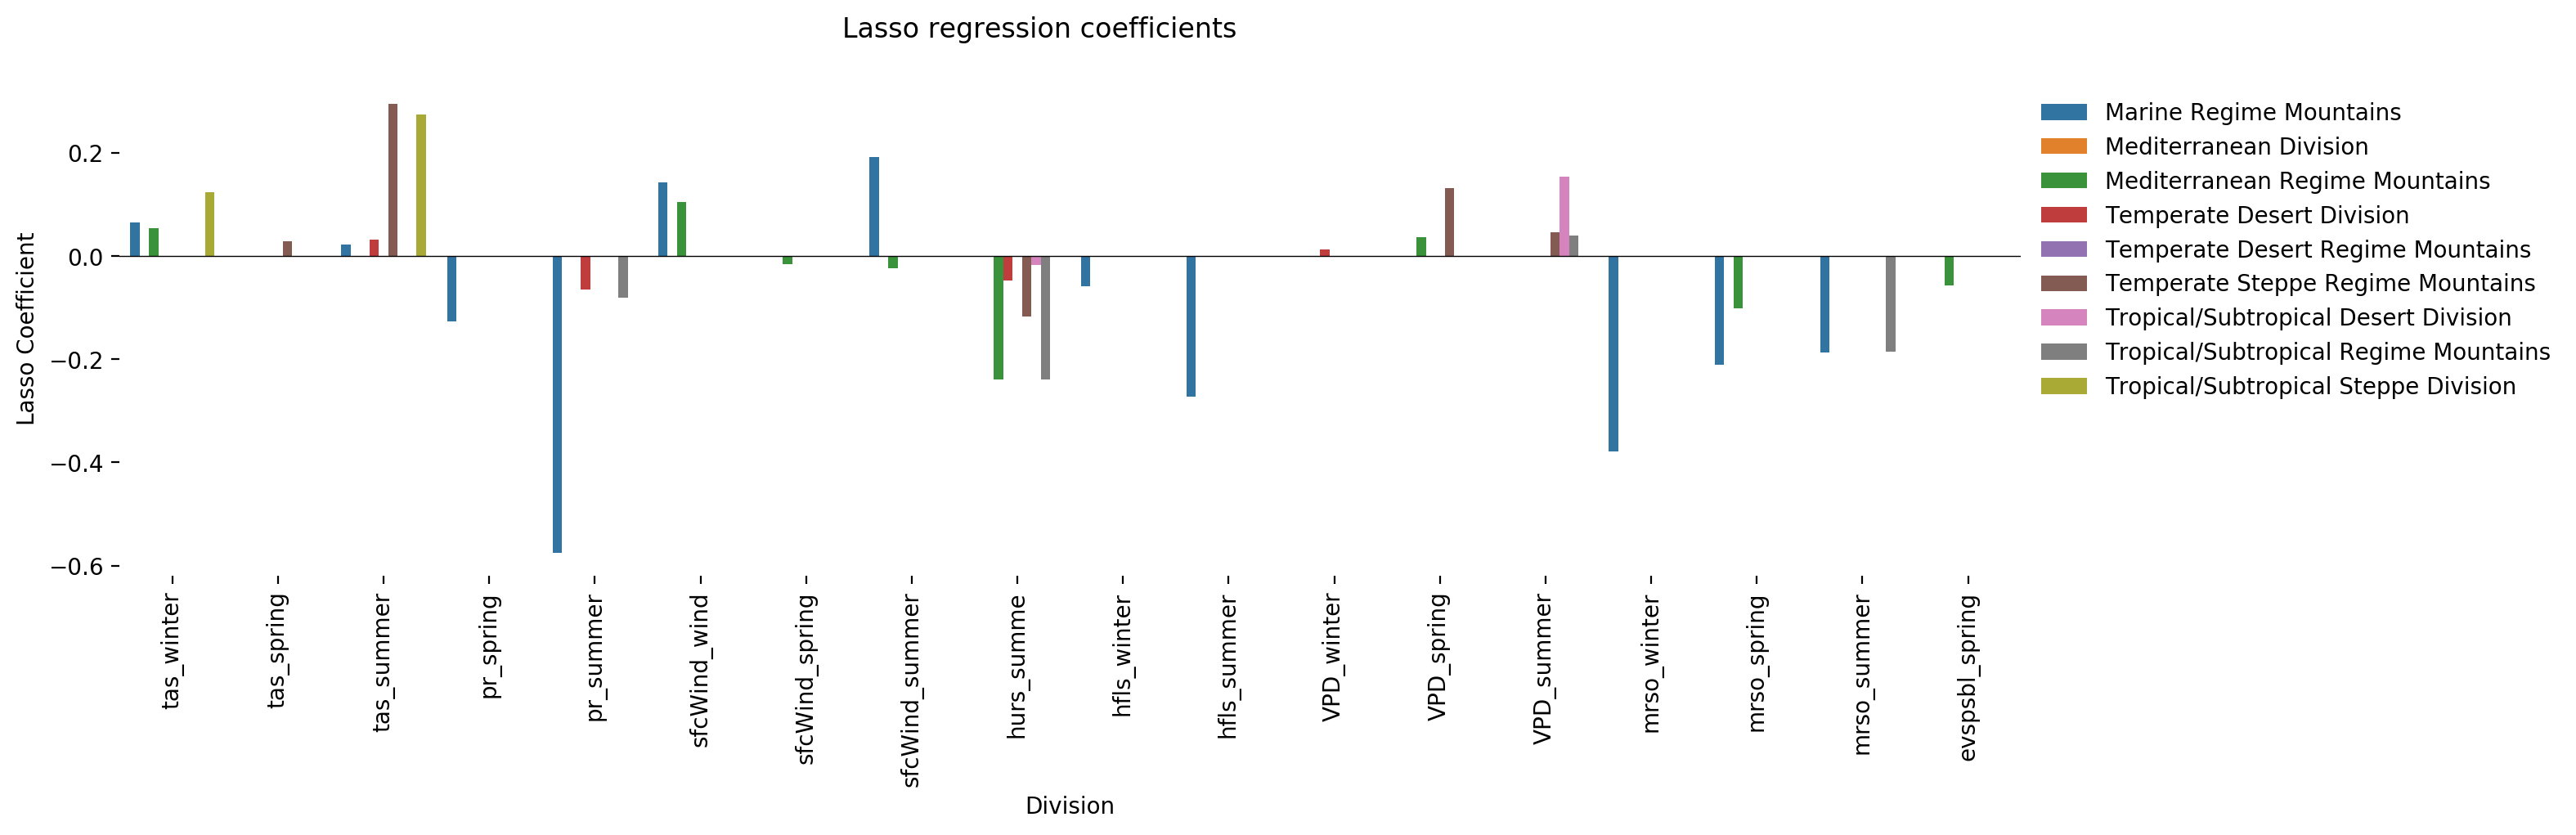

In [30]:
fig = plt.figure(dpi=200, figsize=(15, 4))
fig.suptitle("Lasso regression coefficients")
ax = sns.barplot(x="var", y="r", hue="division", data=df_)
ax.legend( bbox_to_anchor=(1,1.), title="", frameon=False)
ax.set(xlabel='Division', ylabel='Lasso Coefficient')
ax.grid(False)
sns.despine(top=True, right=True, left=True, bottom=True) # gets rid of non-nessisary lines
ax.set_xticklabels(labels=coef_df.columns , rotation=90)
ax.axhline(0,c='k', linewidth=0.5)
# TODO, finish with the predictor label. 
plt.show()

In [30]:
?ax.set_xticklabels

Signature: ax.set_xticklabels(labels, fontdict=None, minor=False, **kwargs)
Docstring:
Set the x-tick labels with list of string labels.

Parameters
----------
labels : List[str]
    List of string labels.

fontdict : dict, optional
    A dictionary controlling the appearance of the ticklabels.
    The default `fontdict` is::

       {'fontsize': rcParams['axes.titlesize'],
        'fontweight': rcParams['axes.titleweight'],
        'verticalalignment': 'baseline',
        'horizontalalignment': loc}

minor : bool, optional
    Whether to set the minor ticklabels rather than the major ones.

Returns
-------
A list of `~.text.Text` instances.

Other Parameters
-----------------
**kwargs : `~.text.Text` properties.
File:      ~/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py
Type:      method


Make all three of the above plots work together below. 

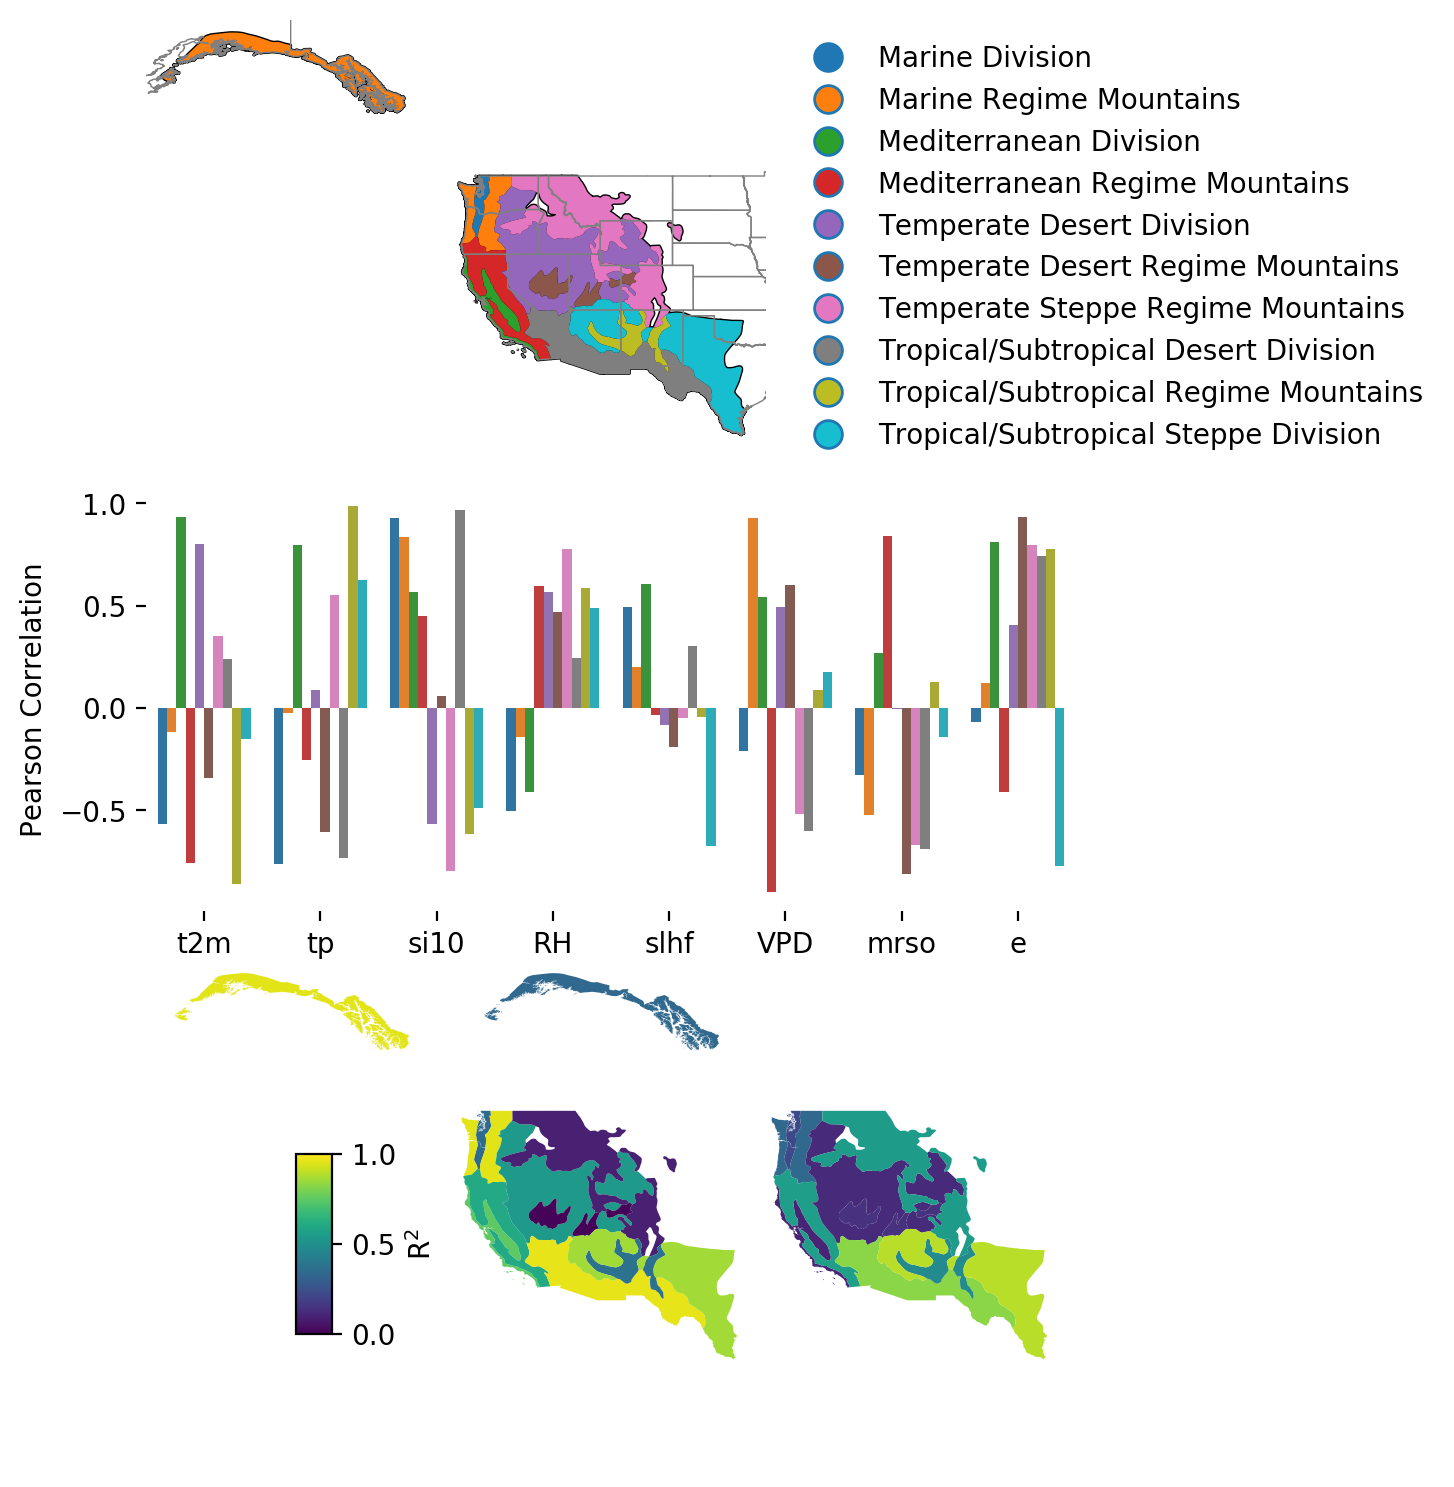

In [152]:
from matplotlib.gridspec import GridSpec

fig=plt.figure(figsize=(6,9), dpi=200)

gs=GridSpec(3,2) # 2 rows, 2 columns

ax1=fig.add_subplot(gs[0,0]) # First row, first column
ax2=fig.add_subplot(gs[1,:]) # Second row, span all columns
ax3=fig.add_subplot(gs[2,0]) # Third row, span all columns
ax4=fig.add_subplot(gs[2,1]) # Third row, span all columns

# First Row -----
ax1.axis('off')

#base = usa.plot(ax=ax, color="white", edgecolor="black")
base = divisions.plot(ax=ax1, color="white", edgecolor="black")
ax_div = divisions.plot(ax=base, column='division', cmap=tab10, categorical=True,legend=True)
plt.title("")

ax_usa=usa.plot(ax=base, facecolor='none', edgecolor="gray", linewidth=0.5)
ax_usa.set_xlim(left=-155, right=-95)
ax_usa.set_ylim(bottom=25, top=63)

# handle the legend
leg = ax_div.get_legend()
leg.set_bbox_to_anchor((0.6, 1, 1.5, 0.0))
leg.set_label(divisions.division)
leg.set_frame_on(False)


# Second Row ------
#ax2.axis('off')

sns.barplot(ax=ax2, x="var", y="r", hue="division", data=df_, palette="tab10")
ax2.get_legend().set_visible(False)
ax2.set(xlabel='', ylabel='Pearson Correlation')
ax2.grid(False)
sns.despine(top=True, right=True, left=True, bottom=True) # gets rid of non-nessisary lines

# Bottom row 
ax3.axis('off'); 
ax3.set(xlabel='Atmos R$^{2}$')
ax4.axis('off')
ax4.set(xlabel='Plant R$^{2}$')

divisions.plot(ax=ax3, column='atmos_r-sq',  vmin=0, vmax=1, legend=False)
divisions.plot(ax=ax4, column='plant_r-sq',  vmin=0, vmax=1, legend=False)
plt.subplots_adjust(wspace=-.5, hspace=.1)
im = plt.gca().get_children()[0]
# [left, bottom, width, height]
cax = fig.add_axes([0.25, .15, 0.03, 0.1]) 
fig.colorbar(im, cax=cax, orientation="vertical", label="R$^{2}$")

fig.savefig('gridspec.png')